<h1> Baselining </h1>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('../data/model/model.csv')

1    119577
0     77620
Name: success, dtype: int64


<Axes: xlabel='success', ylabel='count'>

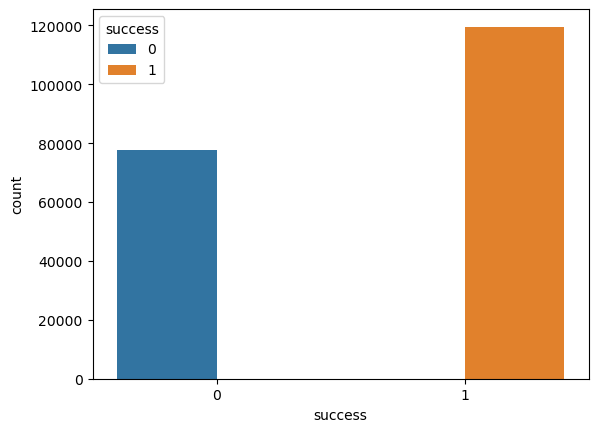

In [12]:
# check for class imbalance
print(df.success.value_counts())
sns.countplot(x="success", data=df, hue="success")

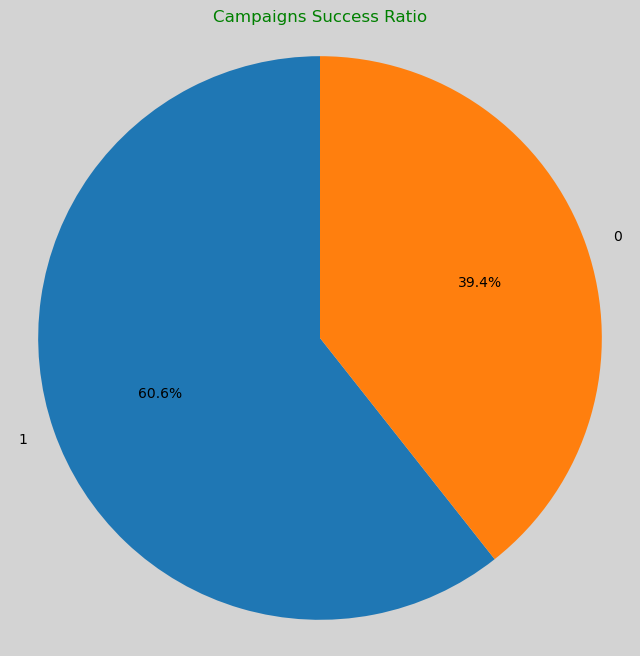

1    119577
0     77620
Name: success, dtype: int64
1    0.606383
0    0.393617
Name: success, dtype: float64


In [16]:
# Calculate the percentage of each campaign status
status_counts = df['success'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure(figsize=(8, 8), facecolor='lightgray')
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'black'})
plt.title('Campaigns Success Ratio', color='green')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()
print(df.success.value_counts())
target = df.success.value_counts(normalize=True) 
print(target)

### Based on the given data, the "success" variable has a slight class imbalance, with approximately 61% of the observations classified as "1" and 39% as "0". While it can be considered a mild imbalance, it may not pose a significant challenge for analysis. However, the impact of class imbalance on model performance should be carefully evaluated and appropriate strategies, such as resampling techniques, can be applied if necessary.

In [17]:
df.columns

Index(['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
       'description_length', 'staff_pick_True', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object')

In [18]:
df.rename(columns={'main_category_Comics': 'Comics',
                   'main_category_Crafts': 'Crafts', 
                   'main_category_Dance': 'Dance', 
                   'main_category_Design': 'Design',
                   'main_category_Fashion': 'Fashion', 
                   'main_category_Film & Video': 'Film_Video',
                   'main_category_Food': 'Food', 
                   'main_category_Games': 'Games', 
                   'main_category_Journalism': 'Journalism',
                   'main_category_Music': 'Music', 
                   'main_category_Photography': 'Photography',
                   'main_category_Publishing': 'Publishing', 
                   'main_category_Technology': 'Technology',
                   'main_category_Theater': 'Theater'}, inplace=True)
df.columns

Index(['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
       'description_length', 'staff_pick_True', 'Comics', 'Crafts', 'Dance',
       'Design', 'Fashion', 'Film_Video', 'Food', 'Games', 'Journalism',
       'Music', 'Photography', 'Publishing', 'Technology', 'Theater'],
      dtype='object')

In [19]:
def make_confusion_matrix(model, threshold=0.6):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_sc)[:,1] >=threshold)
    success_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(success_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['fail','success'],
           yticklabels=['fail','success']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

<h2> Subset 1 </h2>

In [20]:
# baselining with small subset of features
subset_1 = df.loc[:,['success', 'goal_usd', 'country_US', 'cam_duration']]
subset_1.head()

,success,goal_usd,country_US,cam_duration
0,0,1000.00000,1,30
1,0,10000.00000,1,59
2,0,55451.96832,0,30
3,0,25000.00000,1,31
4,0,1500.00000,1,30


#### The following lines of code split the data into training and testing sets and perform feature scaling using the StandardScaler to ensure that the features are on a similar scale for modeling:

In [23]:
#Separates the features (X) and the target variable (y) from the subset_1 DataFrame. The drop function is used to 
#remove the 'success' column from the features, and it is assigned to X, while the 'success' column itself is assigned to y.
X, y = subset_1.drop(['success'], axis=1), subset_1.success

#Splits the data into training and testing sets. It randomly splits the features (X) and the target variable (y) into training and testing subsets. 
#The testing set size is 20% of the entire dataset, and the random state is set to 42 for reproducibility. 
#The training features are assigned to X_train, the testing features to X_test, the training target variable to y_train, and the testing target variable to y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

scaler = StandardScaler() #Initializes a StandardScaler object from the scikit-learn library. The StandardScaler is used to standardize (scale) the features by subtracting the mean and dividing by the standard deviation.
X_train_sc = scaler.fit_transform(X_train) #Fits the scaler on the training features (X_train) and then transforms them to standardized values. The fit_transform method calculates the mean and standard deviation on the training set and applies the transformation to the features.
X_test_sc = scaler.transform(X_test) #Transforms the testing features (X_test) using the previously fitted scaler. The transform method applies the same transformation (mean subtraction and division by standard deviation) to the testing set as done on the training set.

#### The following lines of code evaluate the performance of the logistic regression model by computing various metrics and generating a classification report:

In [24]:
lr = LogisticRegression() #Initializes a logistic regression model.
lr.fit(X_train_sc, y_train) #Trains the logistic regression model using the scaled training data (X_train_sc) and corresponding target labels (y_train).
lr_pred = lr.predict(X_test_sc) #Makes predictions on the scaled test data (X_test_sc) using the trained logistic regression model.
lr_confusion = confusion_matrix(y_test, lr_pred) #Computes the confusion matrix based on the predicted labels (lr_pred) and the actual labels (y_test).

lr_ac = lr.score(X_test_sc, y_test) #Computes the accuracy of the logistic regression model on the test data.
lr_precision = precision_score(y_test, lr_pred) #Computes the precision score of the logistic regression model.
lr_recall = recall_score(y_test, lr_pred) #Computes the recall score of the logistic regression model.
lr_f1 = f1_score(y_test, lr_pred) #Computes the F1 score of the logistic regression model.

lr_y_score = lr.predict_proba(X_test_sc)[:,1] #Predicts the probabilities of the positive class for the test data.
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score) #Computes the Receiver Operating Characteristic (ROC) curve by specifying the true labels (y_test) and the predicted probabilities of the positive class (lr_y_score).
roc_auc_lr = auc(lr_fpr, lr_tpr) #Computes the Area Under the ROC Curve (AUC-ROC) for the logistic regression model.

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.66      0.30      0.41     15569
           1       0.66      0.90      0.76     23871

    accuracy                           0.66     39440
   macro avg       0.66      0.60      0.59     39440
weighted avg       0.66      0.66      0.62     39440



In [27]:
print('Logistic Regression validation metrics with subset 1: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1,
         roc_auc_lr)
     )

Logistic Regression validation metrics with subset 1: 
 Accuracy: 0.6627 
 Precision: 0.6631 
 Recall: 0.8997 
 F1: 0.7635 
 ROC: 0.6516


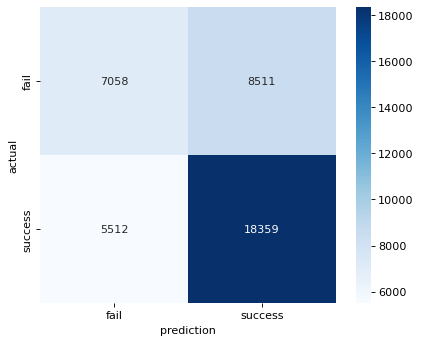

In [28]:
make_confusion_matrix(lr)

<h2> Subset 2 </h2>

In [30]:
subset_2 = df.loc[:,['success', 'goal_usd', 'country_US', 'cam_duration','prep_duration',
       'description_length',]]
subset_2.head()

,success,goal_usd,country_US,cam_duration,prep_duration,description_length
0,0,1000.00000,1,30,20,25
1,0,10000.00000,1,59,81,20
2,0,55451.96832,0,30,5,15
3,0,25000.00000,1,31,1,18
4,0,1500.00000,1,30,72,19


In [31]:
X, y = subset_2.drop(['success'], axis=1), subset_2.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [32]:
lr2 = LogisticRegression(C=1000) #no regularization
lr2.fit(X_train_sc, y_train)
lr2_pred = lr2.predict(X_test_sc)
lr2_confusion = confusion_matrix(y_test, lr2_pred)

lr2_ac = lr2.score(X_test_sc, y_test)
lr2_precision = precision_score(y_test, lr2_pred)
lr2_recall = recall_score(y_test, lr2_pred)
lr2_f1 = f1_score(y_test, lr2_pred)

lr2_y_score = lr2.predict_proba(X_test_sc)[:,1]
lr2_fpr, lr2_tpr, lr2_auc_thresholds = roc_curve(y_test, lr2_y_score)
roc_auc_lr2 = auc(lr2_fpr, lr2_tpr)

print(classification_report(y_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40     15569
           1       0.66      0.91      0.76     23871

    accuracy                           0.66     39440
   macro avg       0.66      0.60      0.58     39440
weighted avg       0.66      0.66      0.62     39440



In [33]:
print('Logistic Regression validation metrics with subset 2: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr2_ac, 
         lr2_precision, 
         lr2_recall,
         lr2_f1,
         roc_auc_lr2)
     )

Logistic Regression validation metrics with subset 2: 
 Accuracy: 0.6621 
 Precision: 0.6612 
 Recall: 0.9059 
 F1: 0.7644 
 ROC: 0.6654


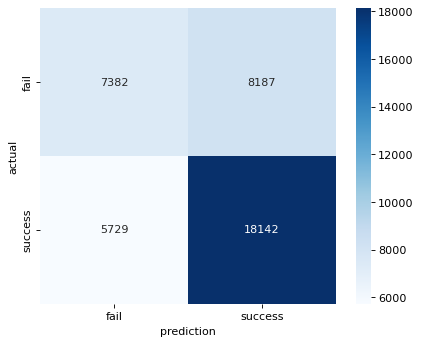

In [34]:
make_confusion_matrix(lr2)

<h1> All Parameters(features) </h1>

In [36]:
X, y = df.drop(['success'], axis=1), df.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [37]:
lr3 = LogisticRegression(C=1000) #no regularization
lr3.fit(X_train_sc, y_train)
lr3_pred = lr3.predict(X_test_sc)
lr3_confusion = confusion_matrix(y_test, lr3_pred)

lr3_ac = lr3.score(X_test_sc, y_test)
lr3_precision = precision_score(y_test, lr3_pred)
lr3_recall = recall_score(y_test, lr3_pred)
lr3_f1 = f1_score(y_test, lr3_pred)

lr3_y_score = lr3.predict_proba(X_test_sc)[:,1]
lr3_fpr, lr3_tpr, lr3_auc_thresholds = roc_curve(y_test, lr3_y_score)
roc_auc_lr3 = auc(lr3_fpr, lr3_tpr)

print(classification_report(y_test, lr3_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58     15569
           1       0.72      0.86      0.79     23871

    accuracy                           0.72     39440
   macro avg       0.71      0.68      0.68     39440
weighted avg       0.71      0.72      0.71     39440



In [38]:
print('Logistic Regression validation metrics with full dataset: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr3_ac, 
         lr3_precision, 
         lr3_recall,
         lr3_f1,
         roc_auc_lr3)
     )

Logistic Regression validation metrics with full dataset: 
 Accuracy: 0.7165 
 Precision: 0.7245 
 Recall: 0.8578 
 F1: 0.7855 
 ROC: 0.7741


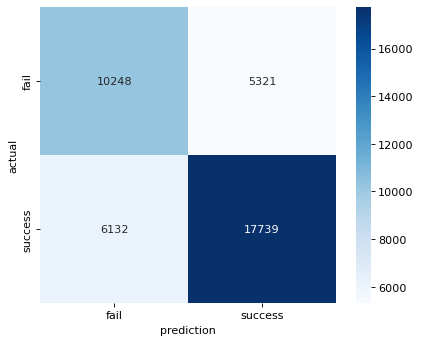

In [39]:
make_confusion_matrix(lr3)

<h1> Comparison of the performance of different subsets of data </h1>

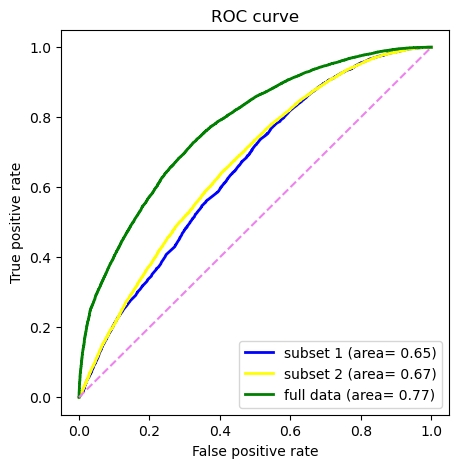

In [44]:
plt.figure(figsize=(5,5))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='blue', lw=lw, 
         label='subset 1 (area= %0.2f)' %roc_auc_lr)
plt.plot(lr2_fpr, lr2_tpr, color='yellow', lw=lw, 
         label='subset 2 (area= %0.2f)' %roc_auc_lr2)
plt.plot(lr3_fpr, lr3_tpr, color='green', lw=lw, 
         label='full data (area= %0.2f)' %roc_auc_lr3)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right');

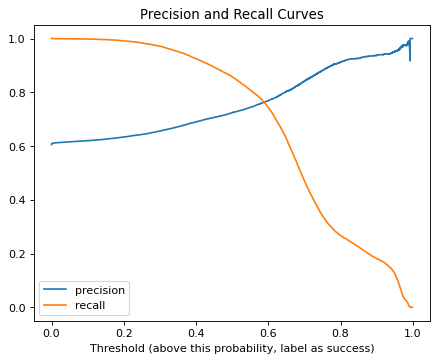

In [45]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr3.predict_proba(X_test_sc)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as success)');
plt.title('Precision and Recall Curves');

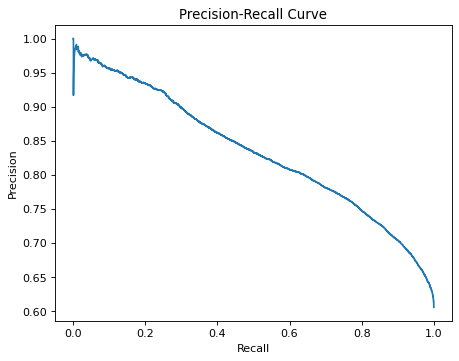

In [46]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [47]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, lr3.predict_proba(X_test_sc))))

from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, lr3.predict_proba(X_test_sc))))

print("Logistic accuracy: {:6.4f}".format(lr3.score(X_test_sc, y_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, y_test)))

Log-loss on logit: 0.5502
Log-loss on dummy classifier: 0.5502
Logistic accuracy: 0.7165
Dummy accuracy: 0.6052
